# H1B Petition Raw Data Loading

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#importing all the packages required for analysis
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import svm
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.linear_model as linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import difflib as dff
%matplotlib inline

In [3]:
## import the data fill
input_file = "H1B_Cleaned_data.csv"
print(input_file)

H1B_Cleaned_data.csv


In [4]:
## read the data file into a dataframe
dataframe1 = pd.read_table(input_file, sep = ',')

In [5]:
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None
len(dataframe1)

1956656

In [6]:
dataframe1.isnull().any()
#u_emp=dataframe1.EMPLOYER_NAME.unique()

Key                   False
CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
CITY                  False
COUNTRY               False
lon                   False
lat                   False
dtype: bool

In [7]:
#print(dataframe1.loc[dataframe1['Key']==737430])
#values=dataframe1['EMPLOYER_NAME'].isnull().values.any(axis=1)
#print(values)
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#df=dataframe1[dataframe1.isnull().any(axis=1)]
#print(df[['Key','EMPLOYER_NAME']])
dataframe1.dropna(subset=['EMPLOYER_NAME','SOC_NAME','JOB_TITLE','COUNTRY'], inplace=True)

In [8]:
len(dataframe1)

1956651

In [9]:
dataframe1.isnull().any()

Key                   False
CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME              False
JOB_TITLE             False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
CITY                  False
COUNTRY               False
lon                   False
lat                   False
dtype: bool

In [10]:
dataframe1.describe()

,Key,PREVAILING_WAGE,YEAR,lon,lat
count,1.956651e+06,1.956651e+06,1.956651e+06,1.956651e+06,1.956651e+06
mean,1.551677e+06,1.785311e+05,2.013755e+03,-9.230953e+01,3.809976e+01
std,8.696917e+05,6.407989e+06,1.697588e+00,1.843174e+01,4.613862e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.820135e+01
25%,7.756840e+05,5.441300e+04,2.012000e+03,-1.119261e+02,3.417056e+01
50%,1.580893e+06,6.647700e+04,2.014000e+03,-8.615807e+01,3.905582e+01
75%,2.306926e+06,8.386600e+04,2.015000e+03,-7.553979e+01,4.086529e+01
max,3.002444e+06,6.997607e+09,2.016000e+03,-6.610574e+01,6.483778e+01


# Preliminary Data Analysis and Preprocessing

Analaysis #1 

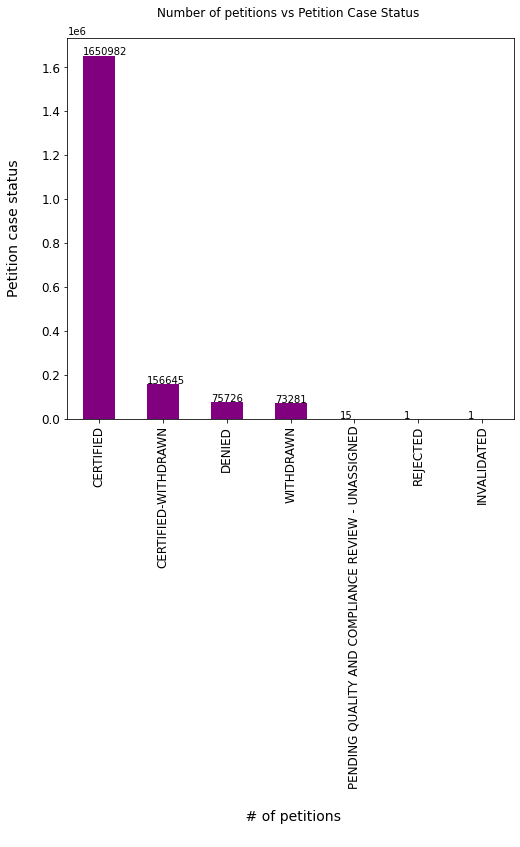

CERTIFIED                                             1650982
CERTIFIED-WITHDRAWN                                    156645
DENIED                                                  75726
WITHDRAWN                                               73281
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64


In [11]:
# Plotting a graph case status against Number of petition
Status_petition_plot = dataframe1['CASE_STATUS'].value_counts().plot(title = 'Number of petitions vs Petition Case Status \n',kind = 'bar', fontsize=12, color = 'purple',linewidth=2.0, figsize = (8, 7))
Status_petition_plot.set_ylabel("Petition case status\n", fontsize=14)
Status_petition_plot.set_xlabel("\n # of petitions\n", fontsize=14)
# Plots the graph

for p in Status_petition_plot.patches:
    Status_petition_plot.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()
# Display the table
print(dataframe1['CASE_STATUS'].value_counts())

In [12]:
# Creating a temprary dataframe for only Certified, Denied and rejected cases
Temp_dataframe = dataframe1.loc[dataframe1['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]
#Temp_dataframe=Temp_dataframe.sort_values(by=['YEAR'], ascending=True)
Temp_dataframe.head(5)

,Key,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,CITY,COUNTRY,lon,lat
0,2643680,CERTIFIED,NYFIXINC,"Computer Software Engineers, Applications",PROJECT MANAGER,Y,101088.0,2011,"NEW YORK, NEW YORK",NEW YORK,NEW YORK,-74.005941,40.712784
2,2643682,CERTIFIED,AFRENUSAINC,Engineering Managers,DRILLING MANAGER,Y,165506.0,2011,"THE WOODLANDS, TEXAS",THE WOODLANDS,TEXAS,-95.461263,30.165821
3,2643683,CERTIFIED,BAINSIGHTLLC,Computer Support Specialists,TECHNICAL SUPPORT ENGINEER,Y,62358.0,2011,"BOSTON, MASSACHUSETTS",BOSTON,MASSACHUSETTS,-71.058880,42.360082
4,2643684,CERTIFIED,NIKEINC,Marketing Managers,SENIOR GLOBAL CATEGORY COMMERCE MANAGER,Y,111405.0,2011,"BEAVERTON, OREGON",BEAVERTON,OREGON,-122.803710,45.487062
5,2643685,CERTIFIED,PENINSULAREGIONALMEDICALCENTER,"Physicians and Surgeons, All Other",ENDOCRINOLOGIST,Y,99632.0,2011,"SALISBURY, MARYLAND",SALISBURY,MARYLAND,-75.599369,38.360674


In [13]:
#datatype conversion and upper case formatting
Temp_dataframe['YEAR'] = Temp_dataframe['YEAR'].astype(int)
Temp_dataframe['EMPLOYER_NAME'] = Temp_dataframe['EMPLOYER_NAME'].str.upper()
Temp_dataframe['SOC_NAME'] = Temp_dataframe['SOC_NAME'].str.upper()
Temp_dataframe['JOB_TITLE'] = Temp_dataframe['JOB_TITLE'].str.upper()
Temp_dataframe['FULL_TIME_POSITION'] = Temp_dataframe['FULL_TIME_POSITION'].str.upper()

In [14]:
Temp_dataframe.head(5)

,Key,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,CITY,COUNTRY,lon,lat
0,2643680,CERTIFIED,NYFIXINC,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS",PROJECT MANAGER,Y,101088.0,2011,"NEW YORK, NEW YORK",NEW YORK,NEW YORK,-74.005941,40.712784
2,2643682,CERTIFIED,AFRENUSAINC,ENGINEERING MANAGERS,DRILLING MANAGER,Y,165506.0,2011,"THE WOODLANDS, TEXAS",THE WOODLANDS,TEXAS,-95.461263,30.165821
3,2643683,CERTIFIED,BAINSIGHTLLC,COMPUTER SUPPORT SPECIALISTS,TECHNICAL SUPPORT ENGINEER,Y,62358.0,2011,"BOSTON, MASSACHUSETTS",BOSTON,MASSACHUSETTS,-71.058880,42.360082
4,2643684,CERTIFIED,NIKEINC,MARKETING MANAGERS,SENIOR GLOBAL CATEGORY COMMERCE MANAGER,Y,111405.0,2011,"BEAVERTON, OREGON",BEAVERTON,OREGON,-122.803710,45.487062
5,2643685,CERTIFIED,PENINSULAREGIONALMEDICALCENTER,"PHYSICIANS AND SURGEONS, ALL OTHER",ENDOCRINOLOGIST,Y,99632.0,2011,"SALISBURY, MARYLAND",SALISBURY,MARYLAND,-75.599369,38.360674


<AxesSubplot:title={'center':'CASE STATUS vs # OF PETITIONS \n '}, xlabel='\n CASE STATUS', ylabel='NUMBER OF PETITIONS \n'>

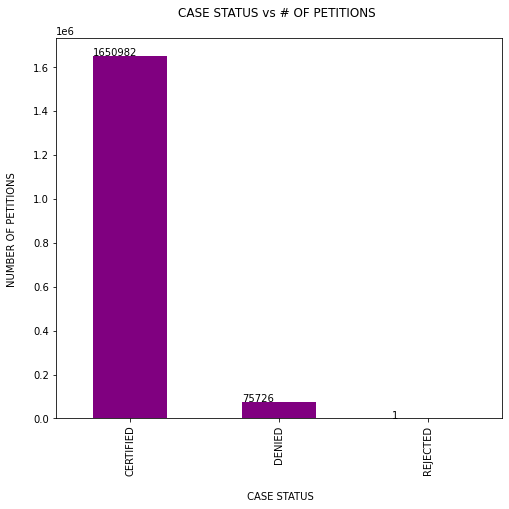

In [15]:
plot_status_petitions = Temp_dataframe['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs # OF PETITIONS \n ',kind = 'bar', color = 'purple', figsize = (8, 7))
plot_status_petitions.set_xlabel("\n CASE STATUS")
plot_status_petitions.set_ylabel("NUMBER OF PETITIONS \n")
for p in plot_status_petitions.patches:
    plot_status_petitions.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.000))
plot_status_petitions

Analysis #2

 Top 10 Employers filing for petition 
 
INFOSYSLIMITED                               26131
IBMINDIAPRIVATELIMITED                       20480
WIPROLIMITED                                 18795
TATACONSULTANCYSERVICESLIMITED               17630
DELOITTECONSULTINGLLP                        16113
ACCENTURELLP                                 15275
HCLAMERICAINC                                11884
TECHMAHINDRAAMERICASINC                      10589
IBMCORPORATION                                9511
COGNIZANTTECHNOLOGYSOLUTIONSUSCORPORATION     8940
Name: EMPLOYER_NAME, dtype: int64


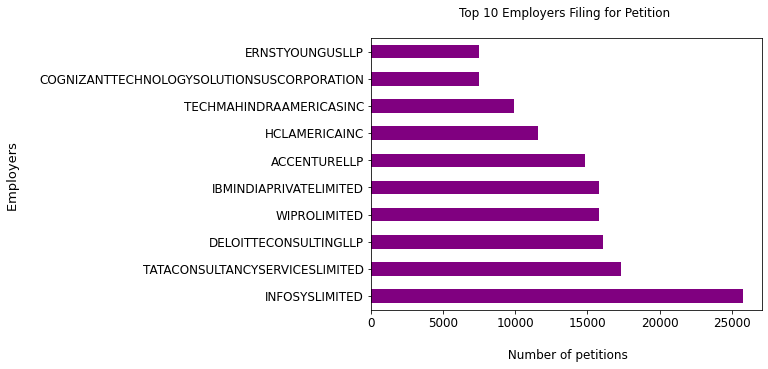

In [16]:
print(" Top 10 Employers filing for petition \n ")
Top_employers_filing_for_petition= Temp_dataframe['EMPLOYER_NAME'].value_counts().head(10).plot.barh(title = "Top 10 Employers Filing for Petition \n", \
                                                                 fontsize=12, color = 'purple',linewidth=2.0, figsize = (7, 5))
Top_employers_filing_for_petition.set_ylabel("Employers \n",fontsize=13)
Top_employers_filing_for_petition.set_xlabel("\n Number of petitions",fontsize=12)
Top_employers_filing_for_petition
print(dataframe1['EMPLOYER_NAME'].value_counts().head(10))


Analysis #3

Top 10 Positions in demand for H1B 

Computer Systems Analysts                    169812
SOFTWARE DEVELOPERS, APPLICATIONS            135825
Software Developers, Applications            134406
Computer Programmers                         130575
COMPUTER SYSTEMS ANALYSTS                    113342
COMPUTER PROGRAMMERS                          78136
COMPUTER OCCUPATIONS, ALL OTHER               61888
Computer Occupations, All Other               42003
Software Developers, Systems Software         30310
Management Analysts                           28787
Financial Analysts                            26655
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE         25226
Computer Software Engineers, Applications     24669
Accountants and Auditors                      23243
Mechanical Engineers                          20173
Name: SOC_NAME, dtype: int64


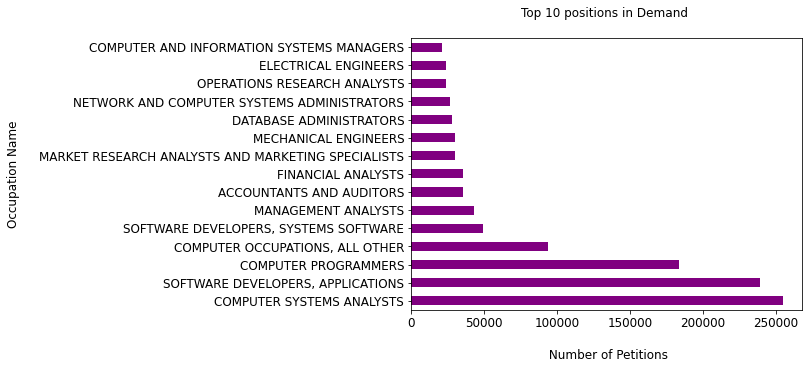

In [17]:
print("Top 10 Positions in demand for H1B \n")
top10_occupation_demading_for_H1B= Temp_dataframe['SOC_NAME'].value_counts().head(15).plot.barh(title = "Top 10 positions in Demand \n", \
                                                                 fontsize=12, color = 'purple',linewidth=2.0, figsize = (7, 5))
top10_occupation_demading_for_H1B.set_ylabel("Occupation Name\n ",fontsize=12)
top10_occupation_demading_for_H1B.set_xlabel("\n Number of Petitions",fontsize=12)
top10_occupation_demading_for_H1B
print(dataframe1['SOC_NAME'].value_counts().head(15))

Analysis #4

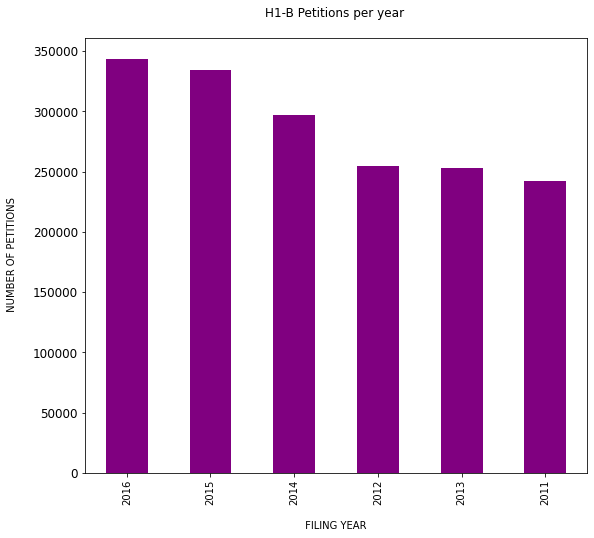

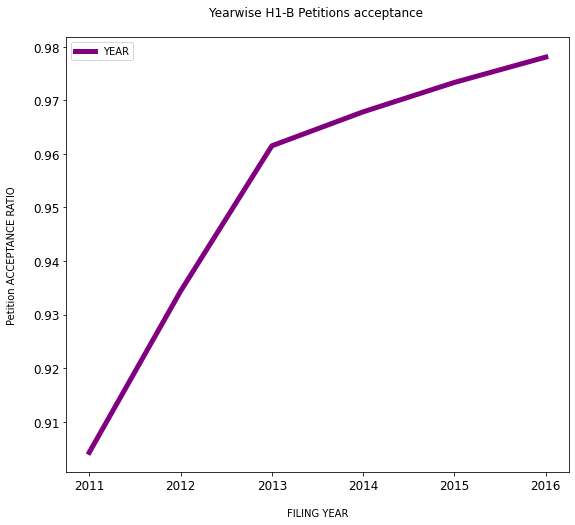

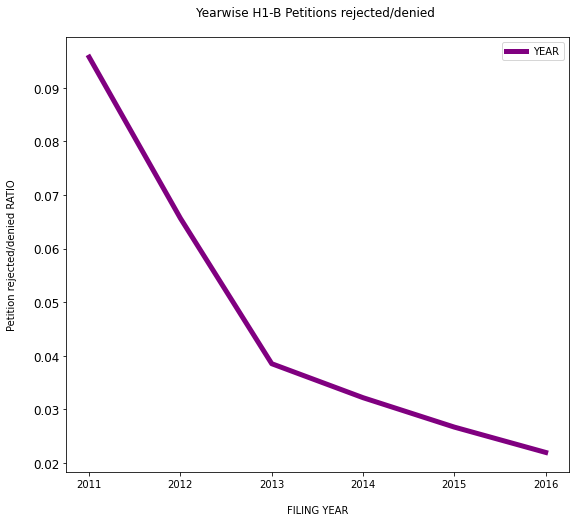

In [18]:
# Number of petitions evry year
#without sorting
yearwise_petition_plot=Temp_dataframe['YEAR'].value_counts().plot(title = "H1-B Petitions per year \n",\
                                                                kind='bar', fontsize=12, color = 'purple',linewidth=5,figsize = (9,8))
yearwise_petition_plot.set_xlabel('\n FILING YEAR ')
yearwise_petition_plot.set_ylabel(' NUMBER OF PETITIONS\n')
yearwise_petition_plot.tick_params(axis='x', which='major', labelsize=5)

                                  
#petition acceptance ratio per year
yearwise_acceptance_plot = pd.DataFrame(Temp_dataframe[Temp_dataframe['CASE_STATUS'] == 'CERTIFIED'].YEAR.value_counts() / Temp_dataframe.YEAR.value_counts())
yearwise_acceptance_plot = yearwise_acceptance_plot.sort_values(['YEAR'])
yearwise_acceptance_plot = yearwise_acceptance_plot.plot(title = 'Yearwise H1-B Petitions acceptance \n', kind = 'line', fontsize=12, color = 'purple',linewidth=5, figsize = (9, 8))
yearwise_acceptance_plot.set_xlabel('\nFILING YEAR')
yearwise_acceptance_plot.set_ylabel('Petition ACCEPTANCE RATIO\n')
yearwise_petition_plot.tick_params(axis='x', which='major', labelsize=10)
plt.show()

#petition acceptance ratio per year
yearwise_rejection_plot = pd.DataFrame(Temp_dataframe[Temp_dataframe['CASE_STATUS'] != 'CERTIFIED'].YEAR.value_counts() / Temp_dataframe.YEAR.value_counts())
yearwise_rejection_plot = yearwise_rejection_plot.sort_values(['YEAR'])
yearwise_rejection_plot = yearwise_rejection_plot.plot(title = 'Yearwise H1-B Petitions rejected/denied \n', kind = 'line', fontsize=12, color = 'purple',linewidth=5, figsize = (9, 8))
yearwise_rejection_plot.set_xlabel('\nFILING YEAR')
yearwise_rejection_plot.set_ylabel('Petition rejected/denied RATIO\n')
yearwise_rejection_plot.tick_params(axis='x', which='major', labelsize=10)
plt.show()

Analysis #5

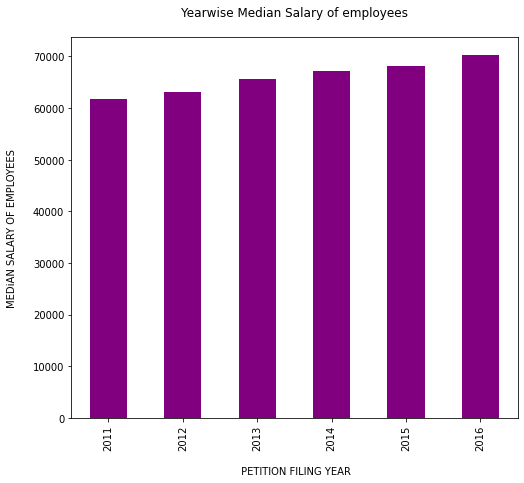

<AxesSubplot:title={'center':'Yearwise Median Salary of employees\n'}, xlabel='\n PETITION FILING YEAR', ylabel='MEDiAN SALARY OF EMPLOYEES\n'>

In [19]:
# Median salary per year
Salary_vs_year = Temp_dataframe.loc[:,['PREVAILING_WAGE', 'YEAR']].groupby(['YEAR']).agg(['median'])

Salary_vs_year = Salary_vs_year.plot(title='Yearwise Median Salary of employees\n',kind = 'bar', color = 'purple', legend = None, figsize = (8, 7))
Salary_vs_year.set_xlabel('\n PETITION FILING YEAR')
Salary_vs_year.set_ylabel('MEDiAN SALARY OF EMPLOYEES\n')
plt.show()
Salary_vs_year

# Feature Encoding

# Filter to keep only  'CERTIFIED' or 'DECLINED' case status

In [20]:
print(Temp_dataframe['CASE_STATUS'].unique())
Temp_dataframe = Temp_dataframe.loc[Temp_dataframe['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])] #filtering
print(Temp_dataframe['CASE_STATUS'].unique())

['CERTIFIED' 'DENIED' 'REJECTED']
['CERTIFIED' 'DENIED']


In [21]:
Temp_dataframe.isnull().sum(axis = 0)

Key                   0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
CITY                  0
COUNTRY               0
lon                   0
lat                   0
dtype: int64

In [22]:
Temp_dataframe1 = Temp_dataframe
print(Temp_dataframe.shape)
print(Temp_dataframe1.shape)

(1726708, 13)
(1726708, 13)


In [23]:
Temp_dataframe1.CASE_STATUS.value_counts()

CERTIFIED    1650982
DENIED         75726
Name: CASE_STATUS, dtype: int64

In [24]:
Temp_dataframe1_denied = Temp_dataframe1[Temp_dataframe1['CASE_STATUS'] == 'DENIED']

In [25]:
Temp_dataframe1_certified = Temp_dataframe1[Temp_dataframe1['CASE_STATUS'] == 'CERTIFIED']

In [26]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = \
train_test_split(Temp_dataframe1[Temp_dataframe1.CASE_STATUS == 'CERTIFIED'],Temp_dataframe1_certified.CASE_STATUS, train_size= 0.06, random_state=1)

In [27]:
training_df = Input_Certified.append(Temp_dataframe1_denied)

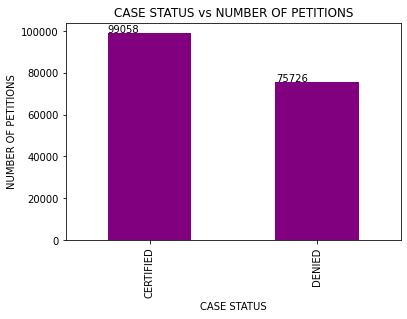

In [28]:
## plot the distribution of the certified and denied samples after downsampling
plot_after_ds = training_df['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'purple')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

#converting the categorical data into numerical categories, This is achieved by identifying the unique values of the columns

In [39]:
# one-hot encoding for every possible and needed column
print("Dataframe with confirmed or denied cases :\n ")
print("*******************************************")
print(training_df.info())
print("*******************************************")
print("Unique values count of each columns :\n")
print("Case Status ",training_df.CASE_STATUS.nunique())
print("Unique Employers ",training_df.EMPLOYER_NAME.nunique())
print("Unique SOCs ", training_df.SOC_NAME.nunique())
print("Unique Job Titles ",training_df.JOB_TITLE.nunique())
print("Unique Employment Type ", training_df.FULL_TIME_POSITION.nunique())
print("Prevailing Wages ",training_df.PREVAILING_WAGE.nunique())
print("Unique Year ",training_df.YEAR.nunique())
print("Unique Worksite State ",training_df.WORKSITE.nunique())
print("Unique CITY State ",training_df.CITY.nunique())
print("Unique COUNTRY State ",training_df.COUNTRY.nunique())


Dataframe with confirmed or denied cases :
 
*******************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174784 entries, 1060556 to 1956649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Key                 174784 non-null  int64  
 1   CASE_STATUS         174784 non-null  object 
 2   EMPLOYER_NAME       174784 non-null  object 
 3   SOC_NAME            174784 non-null  object 
 4   JOB_TITLE           174784 non-null  object 
 5   FULL_TIME_POSITION  174784 non-null  object 
 6   PREVAILING_WAGE     174784 non-null  float64
 7   YEAR                174784 non-null  int32  
 8   WORKSITE            174784 non-null  object 
 9   CITY                174784 non-null  object 
 10  COUNTRY             174784 non-null  object 
 11  lon                 174784 non-null  float64
 12  lat                 174784 non-null  float64
dtypes: float64(3), int32(1), int64(1), obj

# Categorzing the Features

In [48]:
def Prevailing_wage_categorization(prevailing_wage):
    if prevailing_wage <=50000:
        return "VERY LOW"
    elif prevailing_wage >50000 and prevailing_wage <= 70000:
        return "LOW"
    elif prevailing_wage >70000 and prevailing_wage <= 90000:
        return "MEDIUM"
    elif prevailing_wage >90000 and prevailing_wage<=150000:
        return "HIGH"
    elif prevailing_wage >=150000:
        return "VERY HIGH"
    
def Grant_status_Categorization(acceptance_ratio):
    if acceptance_ratio == -1:
        return "AR"
    elif acceptance_ratio >=0.0 and acceptance_ratio<0.20:
        return "VLA"
    elif acceptance_ratio>=0.20 and acceptance_ratio<0.40:
        return "LA"
    elif acceptance_ratio>=0.40 and acceptance_ratio<0.60:
        return "MA"
    elif acceptance_ratio>=0.60 and acceptance_ratio<0.80:
        return "HA"
    elif acceptance_ratio>=0.80:
        return "VHA"
def worksite_collector(worksite):
    return worksite.split(', ')[1]

Feature Creation, One Hot Encoding to convert the categorical field for wage, employer, soc and job

In [45]:
training_df['WORKSITE'] = training_df['WORKSITE'].apply(worksite_collector)
training_df.WORKSITE.unique()

array(['OREGON', 'MICHIGAN', 'NEW YORK', 'CALIFORNIA', 'COLORADO',
       'VIRGINIA', 'FLORIDA', 'TEXAS', 'ILLINOIS', 'NORTH CAROLINA',
       'MASSACHUSETTS', 'WISCONSIN', 'SOUTH CAROLINA', 'GEORGIA', 'OHIO',
       'NEW JERSEY', 'ALABAMA', 'PENNSYLVANIA', 'DISTRICT OF COLUMBIA',
       'TENNESSEE', 'KANSAS', 'KENTUCKY', 'MINNESOTA', 'WASHINGTON',
       'CONNECTICUT', 'INDIANA', 'UTAH', 'MISSOURI', 'ARKANSAS',
       'MARYLAND', 'LOUISIANA', 'RHODE ISLAND', 'ARIZONA', 'IDAHO',
       'IOWA', 'NEW HAMPSHIRE', 'OKLAHOMA', 'DELAWARE', 'NEBRASKA',
       'MISSISSIPPI', 'NEVADA', 'WEST VIRGINIA', 'HAWAII', 'NEW MEXICO',
       'NORTH DAKOTA', 'ALASKA', 'SOUTH DAKOTA', 'MONTANA', 'MAINE',
       'PUERTO RICO', 'VERMONT', 'WYOMING'], dtype=object)

In [59]:
training_df['PREVAILING_WAGE_CATEGORY'] = training_df['PREVAILING_WAGE'].apply(Prevailing_wage_categorization)
training_df['PREVAILING_WAGE_CATEGORY']

1060556         LOW
1227325         LOW
1042292    VERY LOW
1301161      MEDIUM
1016565      MEDIUM
             ...   
1956621    VERY LOW
1956628        HIGH
1956636    VERY LOW
1956647    VERY LOW
1956649    VERY LOW
Name: PREVAILING_WAGE_CATEGORY, Length: 174784, dtype: object

In [60]:
employer_tdf = training_df.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
soc_tdf = training_df.loc[:,['SOC_NAME', 'CASE_STATUS']]
job_tdf = training_df.loc[:,['JOB_TITLE', 'CASE_STATUS']]
print(employer_tdf)

                                     EMPLOYER_NAME CASE_STATUS
1060556                               ACCENTURELLP   CERTIFIED
1227325                     ALTAIRPRODUCTDESIGNINC   CERTIFIED
1042292  STATEUNIVERSITYOFNEWYORKTHECOLLEGEATOLDWE   CERTIFIED
1301161             TATACONSULTANCYSERVICESLIMITED   CERTIFIED
1016565                  PARTNERSHIPHEALTHPLANOFCA   CERTIFIED
...                                            ...         ...
1956621                          STEVENSTRUCKINGCO      DENIED
1956628                                  TEAMFISCH      DENIED
1956636                  SOARINGAMERICACORPORATION      DENIED
1956647          MORANTTRANSPORTATIONINDUSTRIESINC      DENIED
1956649                       AIRINTERNATIONALELLC      DENIED

[174784 rows x 2 columns]


In [51]:
certified_employer_tdf = employer_tdf[employer_tdf.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
certified_soc_tdf = soc_tdf[soc_tdf.CASE_STATUS == 'CERTIFIED'].SOC_NAME
certified_job_tdf = job_tdf[job_tdf.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
confirmed_employer_count = certified_employer_tdf.value_counts()
confirmed_SOC_count = certified_soc_tdf.value_counts()
confirmed_job_count = certified_job_tdf.value_counts()

In [53]:
total_employer_counts = employer_tdf.EMPLOYER_NAME.value_counts()
total_soc_counts = soc_tdf.SOC_NAME.value_counts()
total_job_counts = job_tdf.JOB_TITLE.value_counts()

In [55]:
ratio_final = confirmed_employer_count / total_employer_counts
ratio_final.fillna(-1, inplace=True)
employer_classification_final = ratio_final.apply(Grant_status_Categorization)
training_df['EMPLOYER_ACCEPTANCE'] = training_df.EMPLOYER_NAME.map(employer_classification_final)

In [56]:
ratio_final_soc = confirmed_SOC_count / total_soc_counts
ratio_final_soc.fillna(-1, inplace=True)
soc_classification_final = ratio_final_soc.apply(Grant_status_Categorization)
training_df['SOC_ACCEPTANCE'] = training_df.SOC_NAME.map(soc_classification_final)

In [57]:
ratio_final_job = confirmed_job_count / total_job_counts
ratio_final_job.fillna(-1, inplace=True)
job_classification_final = ratio_final_job.apply(Grant_status_Categorization)
training_df['JOB_ACCEPTANCE'] = training_df.JOB_TITLE.map(job_classification_final)

In [65]:
print("*******************************************")
print("Unique values count of each columns :\n")
print("Case Status ",training_df.CASE_STATUS.nunique())
print("Unique Employers ",training_df.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_df.PREVAILING_WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_df.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_df.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_df.YEAR.nunique())
print("Unique Worksite State ",training_df.WORKSITE.nunique())
print("Unique Employment Type ", training_df.FULL_TIME_POSITION.nunique())
print("*******************************************")
training_df.info()

*******************************************
Unique values count of each columns :

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  52
Unique Employment Type  2
*******************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174784 entries, 1060556 to 1956649
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Key                       174784 non-null  int64  
 1   CASE_STATUS               174784 non-null  object 
 2   EMPLOYER_NAME             174784 non-null  object 
 3   SOC_NAME                  174784 non-null  object 
 4   JOB_TITLE                 174784 non-null  object 
 5   FULL_TIME_POSITION        174784 non-null  object 
 6   PREVAILING_WAGE           174784 non-null  float64
 7   YEAR                      174784 non-null  int32  
 8   WORKSITE                  17

In [66]:
case_status_dict = {"CERTIFIED" : 1, "DENIED": 0}
full_time_position_dict = {"Y" : 1, "N" : 0}
try:    
    training_df['CASE_STATUS'] = training_df['CASE_STATUS'].apply(lambda x: case_status_dict[x])
    training_df['FULL_TIME_POSITION'] = training_df['FULL_TIME_POSITION'].apply(lambda x: full_time_position_dict[x])
except:
    pass

In [68]:
training_df['YEAR'] = training_df['YEAR'].astype('int')
training_df.sort_index(inplace = True)
training_df = training_df.loc[:, ['CASE_STATUS', 'YEAR','WORKSITE', 'PREVAILING_WAGE_CATEGORY','EMPLOYER_ACCEPTANCE',\
                                  'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_df.head()

,CASE_STATUS,YEAR,WORKSITE,PREVAILING_WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
17,0,2011,OHIO,VERY HIGH,HA,AR,LA,1
28,0,2011,NEW YORK,VERY HIGH,HA,MA,MA,1
47,1,2011,DISTRICT OF COLUMBIA,MEDIUM,VHA,VHA,VLA,1
48,0,2011,OHIO,LOW,AR,MA,MA,1
51,1,2011,WASHINGTON,HIGH,HA,VHA,MA,1


In [ ]:
Step 10: Apply One-hot encoding